## CANCER SURVIVAL PREDICTION USING GENE DATA 

In [1]:
#importing the necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the dataset using pandas library 

dataset = pd.read_csv("D:\\AIML SEM 5\\METABRIC_RNA_Mutation.csv")

C:\Users\Lekhashree\anaconda3\envs\new - tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# printing the first 5 rows of the dataset

dataset.head()
# we have 693 features for the given dataset

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# finding the shape of the data to find the length of the dataset 

dataset.shape
# we have 1904 rows of data

(1904, 693)

In [5]:
# printing the datatypes of the columns

for i,j in zip(dataset.columns,dataset.dtypes):
    print(i,"-", j)

patient_id - int64
age_at_diagnosis - float64
type_of_breast_surgery - object
cancer_type - object
cancer_type_detailed - object
cellularity - object
chemotherapy - int64
pam50_+_claudin-low_subtype - object
cohort - float64
er_status_measured_by_ihc - object
er_status - object
neoplasm_histologic_grade - float64
her2_status_measured_by_snp6 - object
her2_status - object
tumor_other_histologic_subtype - object
hormone_therapy - int64
inferred_menopausal_state - object
integrative_cluster - object
primary_tumor_laterality - object
lymph_nodes_examined_positive - float64
mutation_count - float64
nottingham_prognostic_index - float64
oncotree_code - object
overall_survival_months - float64
overall_survival - int64
pr_status - object
radio_therapy - int64
3-gene_classifier_subtype - object
tumor_size - float64
tumor_stage - float64
death_from_cancer - object
brca1 - float64
brca2 - float64
palb2 - float64
pten - float64
tp53 - float64
atm - float64
cdh1 - float64
chek2 - float64
nbn - floa

In [6]:
# to find if the datasets have null value

dataset.isnull().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 693, dtype: int64

In [7]:
# replacing the null values with 0 as float type 

nan_value = []
def appending():
    if j > 0:
        nan_value.append(i)

In [8]:
for i,j in zip(dataset.columns , dataset.isnull().sum()):
    appending()

In [9]:
nan_value

['type_of_breast_surgery',
 'cancer_type_detailed',
 'cellularity',
 'er_status_measured_by_ihc',
 'neoplasm_histologic_grade',
 'tumor_other_histologic_subtype',
 'primary_tumor_laterality',
 'mutation_count',
 'oncotree_code',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer']

In [10]:
dataset.fillna(dataset.dtypes.replace({'float64': 0.0, 'O': 'NULL'}), inplace=True)

In [11]:
# check again to make sure we dont have any more null values

dataset.isnull().sum()

patient_id                0
age_at_diagnosis          0
type_of_breast_surgery    0
cancer_type               0
cancer_type_detailed      0
                         ..
hras_mut                  0
prps2_mut                 0
smarcb1_mut               0
stmn2_mut                 0
siah1_mut                 0
Length: 693, dtype: int64

In [12]:
# doing a value count of the target class to see if there is any imbalance 

dataset["overall_survival"].value_counts()

0    1103
1     801
Name: overall_survival, dtype: int64

In [13]:
# splitting the dependent and independent columns 

X = dataset.drop(['patient_id','death_from_cancer', 'overall_survival'], axis=1)
y = dataset['overall_survival']

In [14]:
# creating one_hot_encoding for object datatype columns to bring it to float values

obj_df = X.select_dtypes(include=['object']).copy()
obj_df

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NULL,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [15]:
for i in obj_df.columns:
    print(i)

type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
pam50_+_claudin-low_subtype
er_status_measured_by_ihc
er_status
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
oncotree_code
pr_status
3-gene_classifier_subtype
pik3ca_mut
tp53_mut
muc16_mut
ahnak2_mut
kmt2c_mut
syne1_mut
gata3_mut
map3k1_mut
ahnak_mut
dnah11_mut
cdh1_mut
dnah2_mut
kmt2d_mut
ush2a_mut
ryr2_mut
dnah5_mut
herc2_mut
pde4dip_mut
akap9_mut
tg_mut
birc6_mut
utrn_mut
tbx3_mut
col6a3_mut
arid1a_mut
lama2_mut
notch1_mut
cbfb_mut
ncor2_mut
col12a1_mut
col22a1_mut
pten_mut
akt1_mut
atr_mut
thada_mut
ncor1_mut
stab2_mut
myh9_mut
runx1_mut
nf1_mut
map2k4_mut
ros1_mut
lamb3_mut
arid1b_mut
erbb2_mut
sf3b1_mut
shank2_mut
ep300_mut
ptprd_mut
usp9x_mut
setd2_mut
setd1a_mut
thsd7a_mut
afdn_mut
erbb3_mut
rb1_mut
myo1a_mut
alk_mut
fanca_mut
adgra2_mut
ubr5_mut
pik3r1_mut
myo3a_mut
asxl2_mut
apc_mut
ctcf_mut
asxl1_mut
fancd2_mut


In [16]:
X = pd.get_dummies(X,columns = list(obj_df.columns.values) , drop_first = True)
print(X)

      age_at_diagnosis  chemotherapy  cohort  neoplasm_histologic_grade  \
0                75.65             0     1.0                        3.0   
1                43.19             0     1.0                        3.0   
2                48.87             1     1.0                        2.0   
3                47.68             1     1.0                        2.0   
4                76.97             1     1.0                        3.0   
...                ...           ...     ...                        ...   
1899             43.10             0     4.0                        3.0   
1900             42.88             0     4.0                        3.0   
1901             62.90             0     4.0                        3.0   
1902             61.16             0     4.0                        2.0   
1903             60.02             0     4.0                        3.0   

      hormone_therapy  lymph_nodes_examined_positive  mutation_count  \
0                   1      

C:\Users\Lekhashree\anaconda3\envs\new - tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_survival', ylabel='count'>

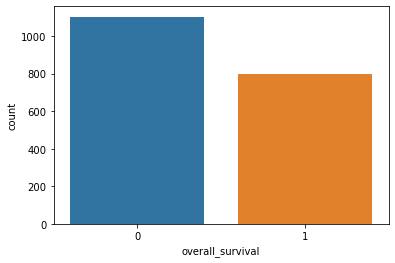

In [17]:
# plotting a  bar-chart to  check the count of the target value

sns.countplot('overall_survival',data=dataset)

C:\Users\Lekhashree\anaconda3\envs\new - tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_at_diagnosis', ylabel='Density'>

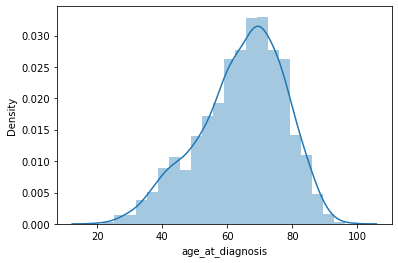

In [18]:
# plotting a distribution table of the age of the persons diagonosis 

sns.distplot(dataset[(dataset.overall_survival==0)]["age_at_diagnosis"])

In [19]:
# spliting the dataset into train and test data for model building 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
# implementing the logistic regression model and viewing the report

lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())

C:\Users\Lekhashree\anaconda3\envs\new - tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       343
           1       0.63      0.65      0.64       229

    accuracy                           0.70       572
   macro avg       0.69      0.70      0.69       572
weighted avg       0.71      0.70      0.71       572



[[254  89]
 [ 80 149]]


<AxesSubplot:>

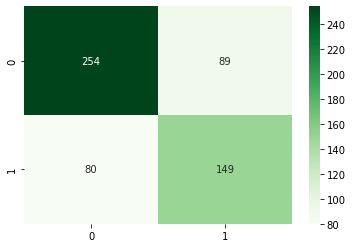

In [23]:
# plotting the confusion matrix of the test data 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',fmt='g')

In [24]:
# lets try using the smote technique to overcome the class imbalanace

from imblearn.over_sampling import SMOTE

In [25]:
# applying smote to train data  

sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [26]:
# applying smote to the test data 

sm = SMOTE(random_state = 0)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())

In [27]:
# checking the class balance 

X_train_res.shape , X_test_res.shape , y_train_res.shape, y_test_res.shape

((1520, 8319), (686, 8319), (1520,), (686,))

In [28]:
# implementing the logistic regression model for the smote applied data and viewing the report

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())

C:\Users\Lekhashree\anaconda3\envs\new - tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = lr1.predict(X_test_res)

print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       343
           1       0.73      0.68      0.70       343

    accuracy                           0.71       686
   macro avg       0.72      0.71      0.71       686
weighted avg       0.72      0.71      0.71       686



<AxesSubplot:>

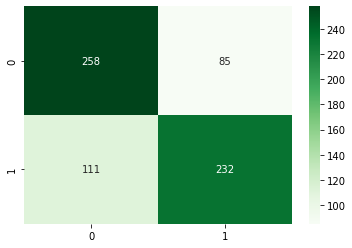

In [30]:
# plotting confusion matrix for the log-reg model with smote 

sns.heatmap(confusion_matrix(y_test_res,predictions),annot=True,cmap='Greens',fmt='g')

In [31]:
# implementing decision tree model for the smote applied data and viewing the report

from sklearn.tree import DecisionTreeClassifier
dt1 =  DecisionTreeClassifier()
dt1.fit(X_train_res, y_train_res.ravel())

DecisionTreeClassifier()

In [32]:
prediction = dt1.predict(X_test_res)
print(confusion_matrix(y_test_res, prediction))
print(classification_report(y_test_res, prediction))

[[251  92]
 [111 232]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       343
           1       0.72      0.68      0.70       343

    accuracy                           0.70       686
   macro avg       0.70      0.70      0.70       686
weighted avg       0.70      0.70      0.70       686



<AxesSubplot:>

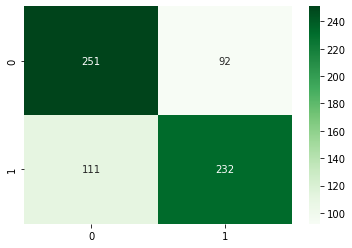

In [33]:
# plotting confusion matrix for the decision tree model with smote 

sns.heatmap(confusion_matrix(y_test_res,prediction),annot=True,cmap='Greens',fmt='g')

In [34]:
# implementing knn model for the smote applied data and viewing the report

knn1 = KNeighborsClassifier(5)
knn1.fit(X_train_res,y_train_res)
k_pred_res = knn1.predict(X_test_res)

In [35]:
print(confusion_matrix(y_test_res, k_pred_res))
print(classification_report(y_test_res,k_pred_res))

[[207 136]
 [ 34 309]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       343
           1       0.69      0.90      0.78       343

    accuracy                           0.75       686
   macro avg       0.78      0.75      0.75       686
weighted avg       0.78      0.75      0.75       686



<AxesSubplot:>

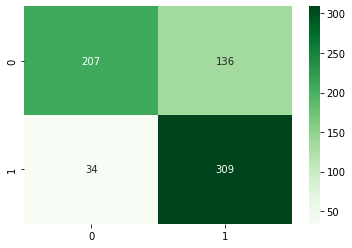

In [36]:
# plotting confusion matrix for the knn model with smote 

sns.heatmap(confusion_matrix(y_test_res,k_pred_res),annot=True,cmap='Greens',fmt='g')

In [37]:
# lets try the random forest algorithm on this smote data and print the results

from sklearn.ensemble import RandomForestClassifier

In [38]:
rf1 = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf1.fit(X_train_res, y_train_res )

RandomForestClassifier(n_estimators=20, random_state=42)

In [39]:
y_pred1 = rf1.predict(X_test_res)

In [40]:
print(confusion_matrix(y_test_res, y_pred1))
print(classification_report(y_test_res,y_pred1))

[[246  97]
 [158 185]]
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       343
           1       0.66      0.54      0.59       343

    accuracy                           0.63       686
   macro avg       0.63      0.63      0.63       686
weighted avg       0.63      0.63      0.63       686



<AxesSubplot:>

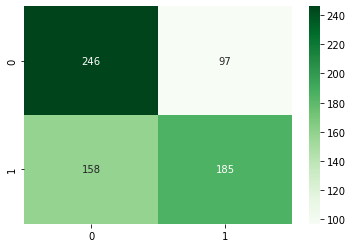

In [41]:
# plotting confusion matrix for the random forest model with smote 

sns.heatmap(confusion_matrix(y_test_res, y_pred1),annot=True,cmap='Greens',fmt='g')

In [42]:
# implementin gt the dimensionality reduction concept to the data 
# lets apply the PCA over the smote data and reduce the data to 10 components 

from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components = 10)
train_X = pca.fit_transform(X_train_res)
test_X = pca.fit_transform(X_test_res)

In [44]:
# applying pca for logistic regression model 

pca_log = LogisticRegression()

In [45]:
pca_log.fit(train_X, y_train_res)

LogisticRegression()

In [46]:
pca_log_pred = pca_log.predict(test_X)

In [47]:
print(confusion_matrix(y_test_res, pca_log_pred))
print(classification_report(y_test_res,pca_log_pred))

[[255  88]
 [ 97 246]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       343
           1       0.74      0.72      0.73       343

    accuracy                           0.73       686
   macro avg       0.73      0.73      0.73       686
weighted avg       0.73      0.73      0.73       686



<AxesSubplot:>

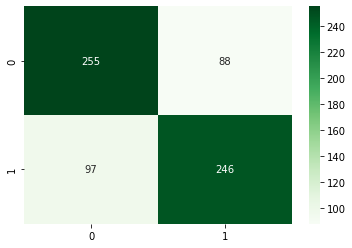

In [48]:
# plotting confusion matrix for the pca-applied-logistic model 

sns.heatmap(confusion_matrix(y_test_res, pca_log_pred),annot=True,cmap='Greens',fmt='g')

In [49]:
# implementing the bagging algorithm over the smote data

from sklearn.ensemble import BaggingClassifier

In [50]:
bag_class = BaggingClassifier(base_estimator=dt1,n_estimators = 100 , max_features = 10 , max_samples = 100)

In [51]:
bag_class.fit(X_test_res , y_test_res)
b_pred_res = bag_class.predict(X_test_res)

In [52]:
print(confusion_matrix(y_test_res, b_pred_res))
print(classification_report(y_test_res,b_pred_res)) 
print(classification_report(y_test, b_pred_res))

[[280  63]
 [ 56 287]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       343
           1       0.82      0.84      0.83       343

    accuracy                           0.83       686
   macro avg       0.83      0.83      0.83       686
weighted avg       0.83      0.83      0.83       686



<AxesSubplot:>

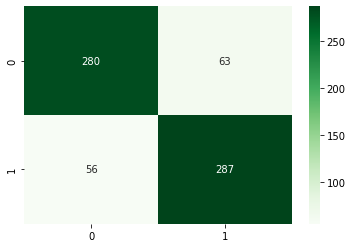

In [53]:
sns.heatmap(confusion_matrix(y_test_res,b_pred_res),annot=True,cmap='Greens',fmt='g')

## **ACCURACY PREDICTION**

**LOGISTIC REGRESSION (WITHOUT SMOTE) - 70**

**LOGISTIC REGRESSION (WITH SMOTE)    - 75**

**DECISION TREE (WITH SMOTE)          - 70**

**KNN (WITH SMOTE)                    - 75**

**RANDOM FOREST (WITH SMOTE)          - 63**

**PCA (WITH SMOTE)                    - 73**

**BAGGING (WITH SMOTE)                - 83**